<a href="https://colab.research.google.com/github/sush0037/my-portfolio/blob/master/indian_district_population_analysis_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
#import dataset
from google.colab import files
uploaded = files.upload()

Saving census2011.csv to census2011 (1).csv


In [14]:
for col in columns_for_clustering:
    mean_val = df_clustering[col].mean()
    std_val = df_clustering[col].std()
    df_clustering[col] = (df_clustering[col] - mean_val) / std_val

print("Standardized features:")
print(df_clustering.head())

Standardized features:
   Population    Growth  Sex-Ratio  Literacy
0    5.881443  1.104966  -0.961910  1.156038
1    5.211059 -0.493453   0.164663  1.111449
2    4.963276  1.849829  -0.472095  1.453925
3    4.840643  0.728868  -0.488423  1.309725
4    4.794406 -0.743519  -1.386416  1.666431


In [15]:
import numpy as np

def initialize_centroids(data, k):
    """Randomly selects k data points from the input data as initial centroids."""
    # Ensure data is a numpy array for easier indexing
    data_np = data.to_numpy() if hasattr(data, 'to_numpy') else data
    indices = np.random.choice(data_np.shape[0], k, replace=False)
    return data_np[indices]

def euclidean_distance(point1, point2):
    """Calculates the Euclidean distance between two data points."""
    return np.sqrt(np.sum((point1 - point2)**2))

def assign_to_clusters(data, centroids):
    """Assigns each data point to the closest centroid."""
    assignments = []
    data_np = data.to_numpy() if hasattr(data, 'to_numpy') else data
    for i in range(data_np.shape[0]):
        distances = [euclidean_distance(data_np[i], centroid) for centroid in centroids]
        cluster_assignment = np.argmin(distances)
        assignments.append(cluster_assignment)
    return np.array(assignments)

def update_centroids(data, assignments, k):
    """Recalculates the centroids based on the mean of assigned points."""
    new_centroids = np.zeros((k, data.shape[1]))
    data_np = data.to_numpy() if hasattr(data, 'to_numpy') else data
    for i in range(k):
        points_in_cluster = data_np[assignments == i]
        if len(points_in_cluster) > 0:
            new_centroids[i] = np.mean(points_in_cluster, axis=0)
        else:
            # If a cluster becomes empty, reinitialize its centroid randomly
            # This can happen in K-Means, a common strategy is to re-pick a random data point
            new_centroids[i] = data_np[np.random.choice(data_np.shape[0], 1, replace=False)]
    return new_centroids

def kmeans(data, k, max_iterations=100, tolerance=1e-4):
    """Main K-Means algorithm implementation."""
    centroids = initialize_centroids(data, k)
    previous_centroids = np.copy(centroids)

    for iteration in range(max_iterations):
        assignments = assign_to_clusters(data, centroids)
        centroids = update_centroids(data, assignments, k)

        # Check for convergence
        if np.max(np.abs(centroids - previous_centroids)) < tolerance:
            print(f"K-Means converged after {iteration + 1} iterations.")
            break
        previous_centroids = np.copy(centroids)
    else:
        print(f"K-Means did not converge after {max_iterations} iterations.")

    return centroids, assignments

print("K-Means functions defined successfully.")

K-Means functions defined successfully.


In [16]:
def calculate_wcss(data, centroids, assignments):
    """Calculates the Within-Cluster Sum of Squares (WCSS)."""
    wcss = 0
    data_np = data.to_numpy() if hasattr(data, 'to_numpy') else data
    for i, centroid in enumerate(centroids):
        points_in_cluster = data_np[assignments == i]
        for point in points_in_cluster:
            wcss += euclidean_distance(point, centroid)**2
    return wcss

wcss_values = []
k_values = [3, 4, 5]

for k in k_values:
    print(f"Running K-Means for k={k}...")
    centroids, assignments = kmeans(df_clustering, k)
    wcss = calculate_wcss(df_clustering, centroids, assignments)
    wcss_values.append(wcss)
    print(f"WCSS for k={k}: {wcss:.2f}\n")

print("WCSS values for each k:")
for i, k in enumerate(k_values):
    print(f"k={k}: {wcss_values[i]:.2f}")

Running K-Means for k=3...
K-Means converged after 11 iterations.
WCSS for k=3: 1633.36

Running K-Means for k=4...
K-Means converged after 15 iterations.
WCSS for k=4: 1410.12

Running K-Means for k=5...
K-Means converged after 11 iterations.
WCSS for k=5: 1277.27

WCSS values for each k:
k=3: 1633.36
k=4: 1410.12
k=5: 1277.27


In [17]:
import matplotlib.pyplot as plt

def kmeans_with_history(data, k, max_iterations=100, tolerance=1e-4):
    """Main K-Means algorithm implementation that also tracks centroid history."""
    centroids = initialize_centroids(data, k)
    previous_centroids = np.copy(centroids)
    centroid_history = [centroids.copy()] # Store initial centroids

    for iteration in range(max_iterations):
        assignments = assign_to_clusters(data, centroids)
        centroids = update_centroids(data, assignments, k)
        centroid_history.append(centroids.copy())

        # Check for convergence
        if np.max(np.abs(centroids - previous_centroids)) < tolerance:
            print(f"K-Means converged after {iteration + 1} iterations.")
            break
        previous_centroids = np.copy(centroids)
    else:
        print(f"K-Means did not converge after {max_iterations} iterations.")

    return centroids, assignments, centroid_history

print("Matplotlib imported and kmeans_with_history function defined.")

Matplotlib imported and kmeans_with_history function defined.


Running K-Means for k=3 to visualize clusters...
K-Means converged after 30 iterations.


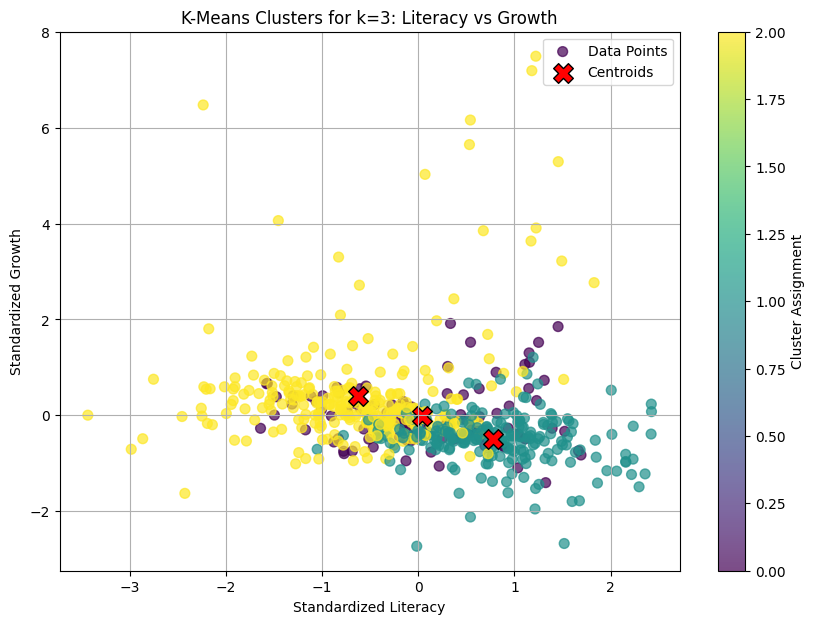

Running K-Means for k=4 to visualize clusters...
K-Means converged after 15 iterations.


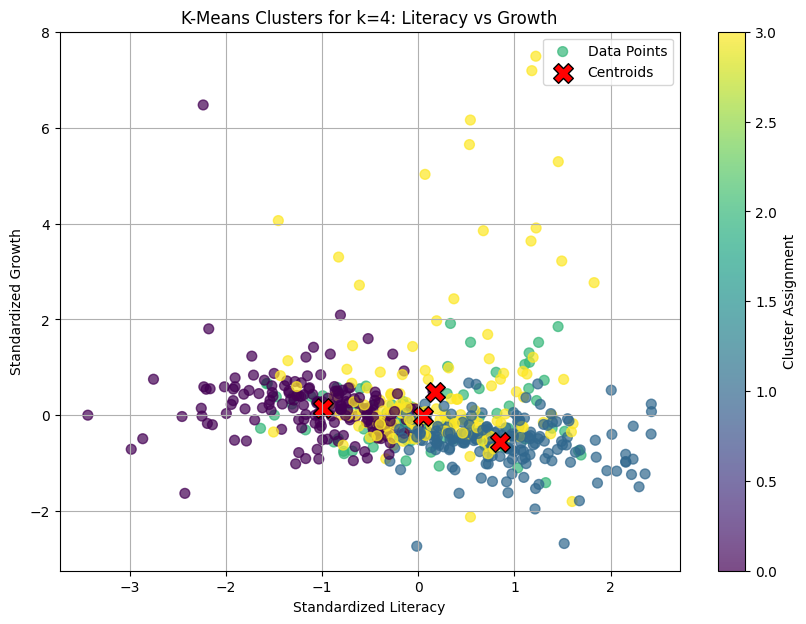

Running K-Means for k=5 to visualize clusters...
K-Means converged after 8 iterations.


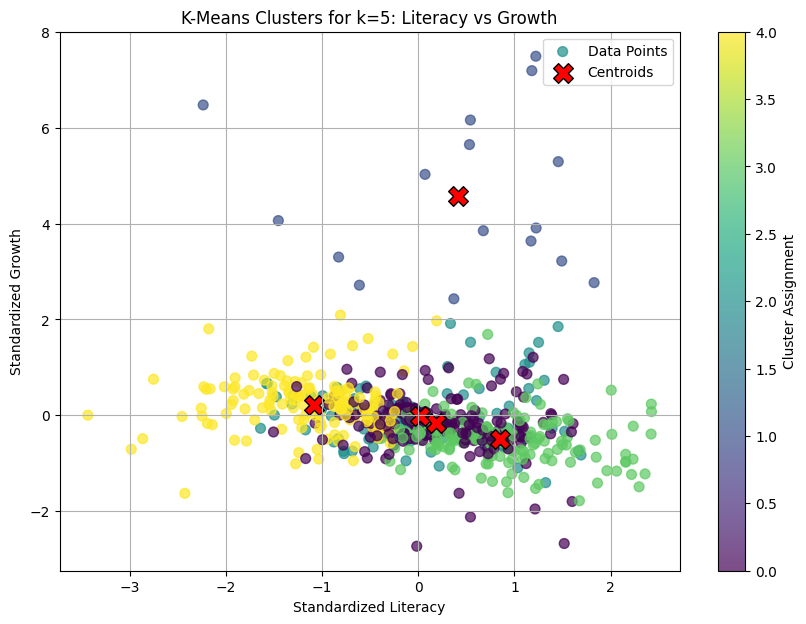


Running K-Means with history for k=3 to visualize centroid evolution...
K-Means converged after 18 iterations.


/tmp/ipython-input-1498376976.py:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', selected_k_for_evolution)


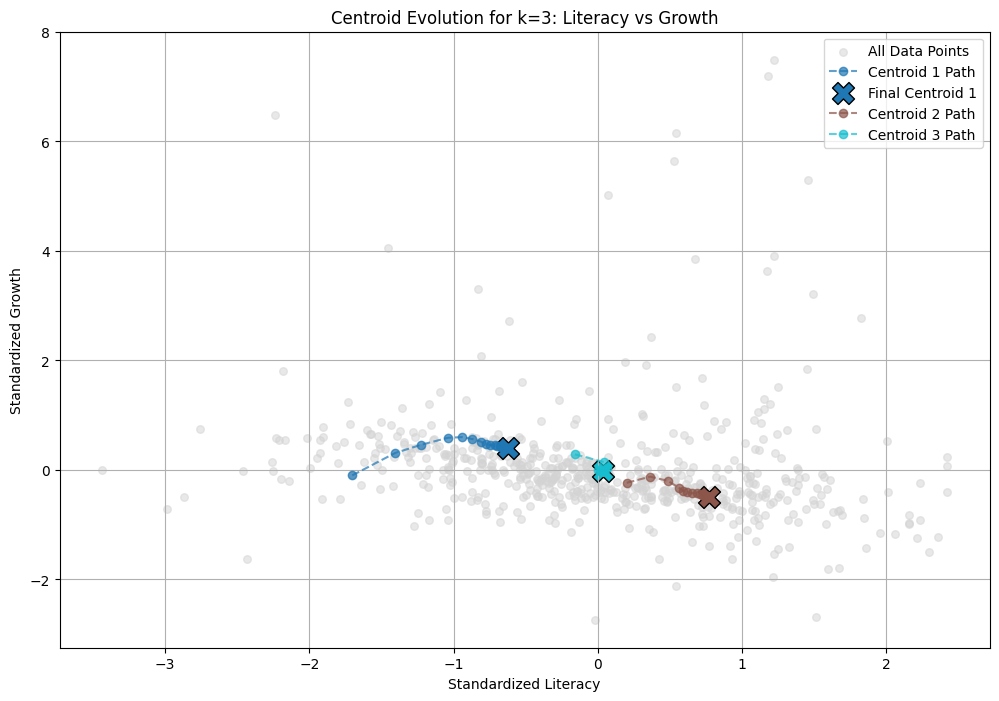

Visualizations for clusters and centroid evolution completed


In [18]:
feature_x_idx = columns_for_clustering.index('Literacy')
feature_y_idx = columns_for_clustering.index('Growth')

# Get original data for plotting in the background
data_for_plot = df_clustering.to_numpy()

# --- Plot Clusters for each k ---
k_values = [3, 4, 5]

# Store results for WCSS calculation and future reference
all_centroids = {}
all_assignments = {}

for k in k_values:
    print(f"Running K-Means for k={k} to visualize clusters...")
    centroids, assignments = kmeans(df_clustering, k)
    all_centroids[k] = centroids
    all_assignments[k] = assignments

    plt.figure(figsize=(10, 7))
    # Plot data points colored by cluster assignment
    scatter = plt.scatter(data_for_plot[:, feature_x_idx], data_for_plot[:, feature_y_idx],
                          c=assignments, cmap='viridis', s=50, alpha=0.7, label='Data Points')

    # Plot centroids
    plt.scatter(centroids[:, feature_x_idx], centroids[:, feature_y_idx],
                marker='X', s=200, c='red', edgecolor='black', linewidth=1, label='Centroids')

    plt.title(f'K-Means Clusters for k={k}: Literacy vs Growth')
    plt.xlabel('Standardized Literacy')
    plt.ylabel('Standardized Growth')
    plt.colorbar(scatter, label='Cluster Assignment')
    plt.legend()
    plt.grid(True)
    plt.show()

# --- Plot Centroid Evolution for a selected k (e.g., k=3) ---
selected_k_for_evolution = 3
print(f"\nRunning K-Means with history for k={selected_k_for_evolution} to visualize centroid evolution...")
centroids_final, assignments_final, centroid_history = kmeans_with_history(df_clustering, selected_k_for_evolution)

plt.figure(figsize=(12, 8))
# Plot all data points in background
plt.scatter(data_for_plot[:, feature_x_idx], data_for_plot[:, feature_y_idx],
            c='lightgray', s=30, alpha=0.5, label='All Data Points')

colors = plt.cm.get_cmap('tab10', selected_k_for_evolution)

for i in range(selected_k_for_evolution):
    # Extract history for a single centroid
    centroid_path = np.array([h[i] for h in centroid_history])

    # Plot centroid path
    plt.plot(centroid_path[:, feature_x_idx], centroid_path[:, feature_y_idx],
             color=colors(i), marker='o', linestyle='--', markersize=6,
             label=f'Centroid {i+1} Path', alpha=0.7)

    # Plot final centroid position
    plt.scatter(centroid_path[-1, feature_x_idx], centroid_path[-1, feature_y_idx],
                marker='X', s=250, color=colors(i), edgecolor='black', linewidth=1,
                label=f'Final Centroid {i+1}' if i==0 else "") # Label only once for clarity

plt.title(f'Centroid Evolution for k={selected_k_for_evolution}: Literacy vs Growth')
plt.xlabel('Standardized Literacy')
plt.ylabel('Standardized Growth')
plt.legend(loc='best')
plt.grid(True)
plt.show()

print("Visualizations for clusters and centroid evolution completed")

Running K-Means for k=3 to visualize clusters...
K-Means converged after 17 iterations.


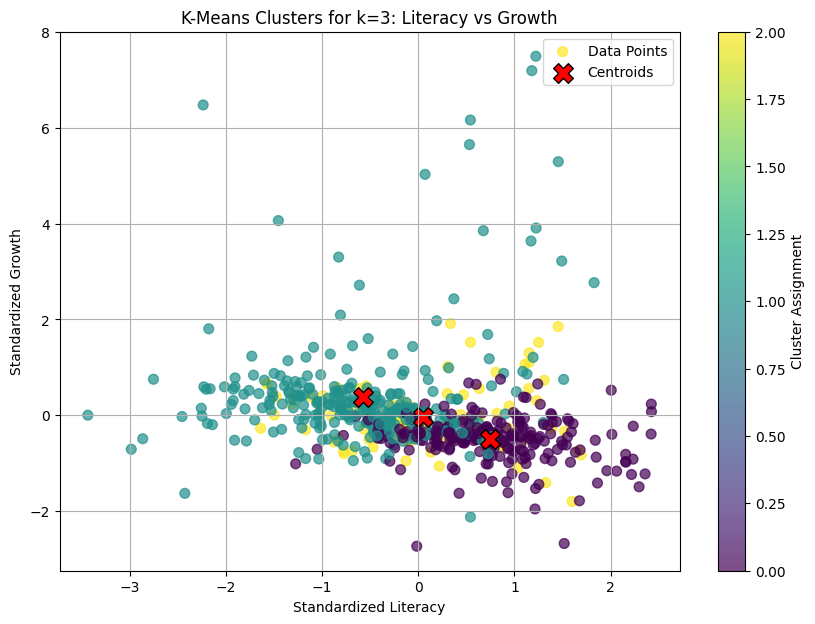

Running K-Means for k=4 to visualize clusters...
K-Means converged after 25 iterations.


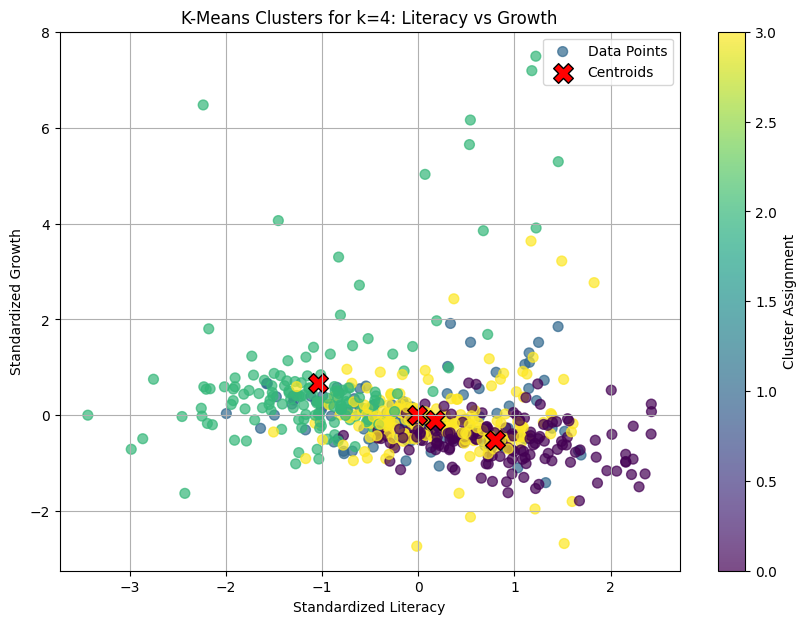

Running K-Means for k=5 to visualize clusters...
K-Means converged after 39 iterations.


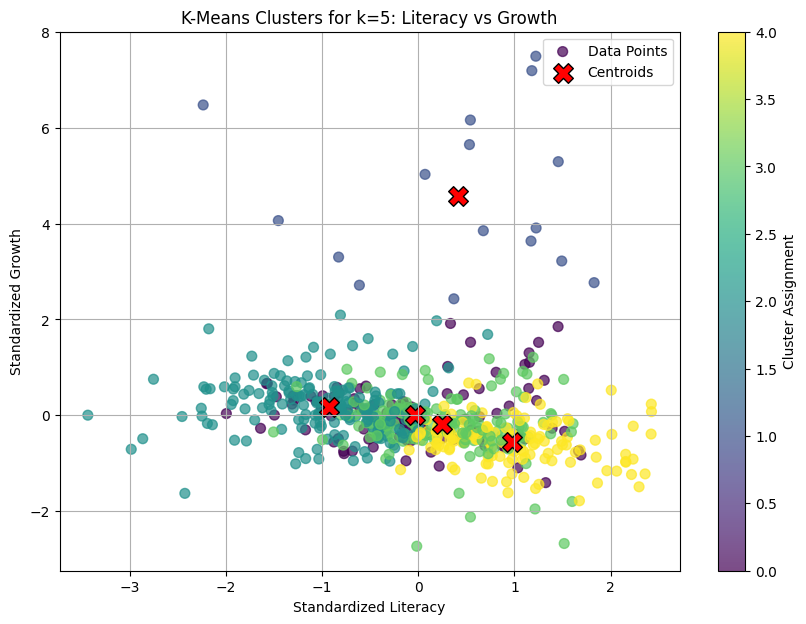


Running K-Means with history for k=3 to visualize centroid evolution...
K-Means converged after 16 iterations.


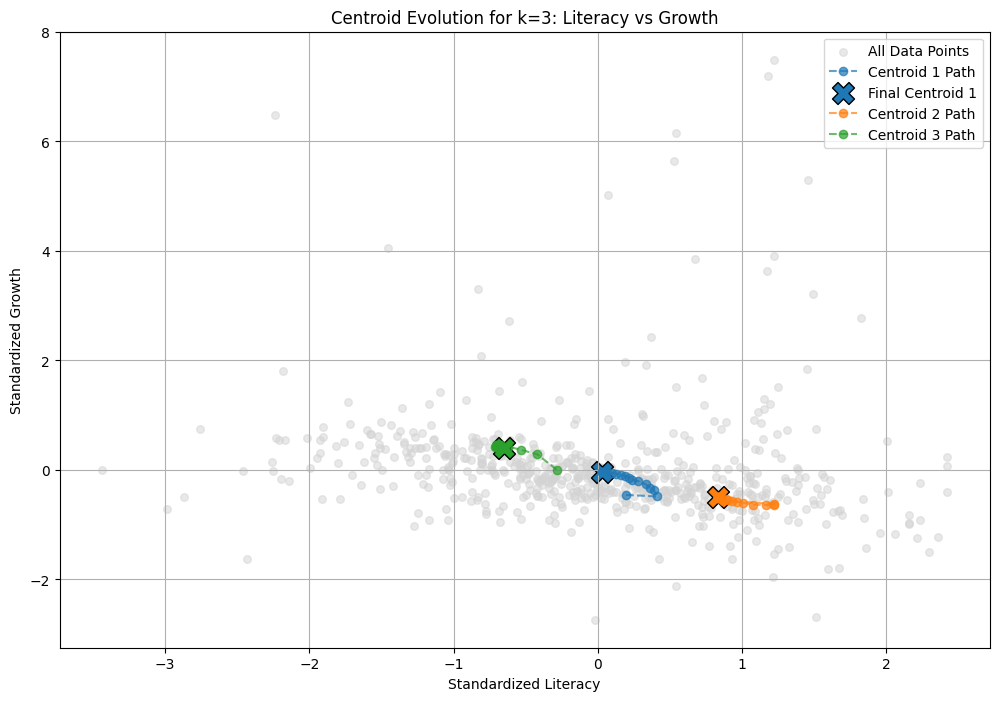

Visualizations for clusters and centroid evolution completed.


In [19]:
feature_x_idx = columns_for_clustering.index('Literacy')
feature_y_idx = columns_for_clustering.index('Growth')

# Get original data for plotting in the background
data_for_plot = df_clustering.to_numpy()

# --- Plot Clusters for each k ---
k_values = [3, 4, 5]

# Store results for WCSS calculation and future reference
all_centroids = {}
all_assignments = {}

for k in k_values:
    print(f"Running K-Means for k={k} to visualize clusters...")
    centroids, assignments = kmeans(df_clustering, k)
    all_centroids[k] = centroids
    all_assignments[k] = assignments

    plt.figure(figsize=(10, 7))
    # Plot data points colored by cluster assignment
    scatter = plt.scatter(data_for_plot[:, feature_x_idx], data_for_plot[:, feature_y_idx],
                          c=assignments, cmap='viridis', s=50, alpha=0.7, label='Data Points')

    # Plot centroids
    plt.scatter(centroids[:, feature_x_idx], centroids[:, feature_y_idx],
                marker='X', s=200, c='red', edgecolor='black', linewidth=1, label='Centroids')

    plt.title(f'K-Means Clusters for k={k}: Literacy vs Growth')
    plt.xlabel('Standardized Literacy')
    plt.ylabel('Standardized Growth')
    plt.colorbar(scatter, label='Cluster Assignment')
    plt.legend()
    plt.grid(True)
    plt.show()

# --- Plot Centroid Evolution for a selected k (e.g., k=3) ---
selected_k_for_evolution = 3
print(f"\nRunning K-Means with history for k={selected_k_for_evolution} to visualize centroid evolution...")
centroids_final, assignments_final, centroid_history = kmeans_with_history(df_clustering, selected_k_for_evolution)

plt.figure(figsize=(12, 8))
# Plot all data points in background
plt.scatter(data_for_plot[:, feature_x_idx], data_for_plot[:, feature_y_idx],
            c='lightgray', s=30, alpha=0.5, label='All Data Points')

# Fix: Use matplotlib.colormaps.get_cmap instead of plt.cm.get_cmap to avoid deprecation warning
colors = plt.colormaps.get_cmap('tab10')

for i in range(selected_k_for_evolution):
    # Extract history for a single centroid
    centroid_path = np.array([h[i] for h in centroid_history])

    # Plot centroid path
    plt.plot(centroid_path[:, feature_x_idx], centroid_path[:, feature_y_idx],
             color=colors(i), marker='o', linestyle='--', markersize=6,
             label=f'Centroid {i+1} Path', alpha=0.7)

    # Plot final centroid position
    plt.scatter(centroid_path[-1, feature_x_idx], centroid_path[-1, feature_y_idx],
                marker='X', s=250, color=colors(i), edgecolor='black', linewidth=1,
                label=f'Final Centroid {i+1}' if i==0 else "") # Label only once for clarity

plt.title(f'Centroid Evolution for k={selected_k_for_evolution}: Literacy vs Growth')
plt.xlabel('Standardized Literacy')
plt.ylabel('Standardized Growth')
plt.legend(loc='best')
plt.grid(True)
plt.show()

print("Visualizations for clusters and centroid evolution completed.")

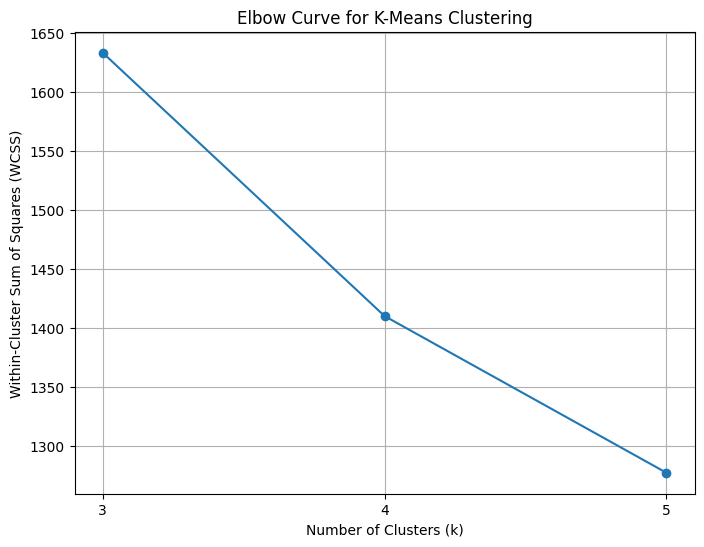

Elbow Curve generated successfully.


In [20]:
plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss_values, marker='o', linestyle='-')
plt.title('Elbow Curve for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.xticks(k_values)
plt.show()

print("Elbow Curve generated successfully.")

In [21]:
import pandas as pd

# Reload the original dataset to ensure we have unstandardized features
df_original = pd.read_csv('census2011.csv')

# Define the columns that need cleaning and type conversion
columns_to_clean = ['Population', 'Growth', 'Sex-Ratio', 'Literacy']

# Preprocess numerical columns
for col in columns_to_clean:
    if col == 'Growth':
        # Remove '%' and convert to float
        df_original[col] = df_original[col].str.replace('%', '', regex=False).astype(float)
    elif col == 'Population':
        # Remove commas and convert to float
        df_original[col] = df_original[col].str.replace(',', '', regex=False).astype(float)
    else:
        # Directly convert to float for 'Sex-Ratio' and 'Literacy' assuming no other non-numeric chars
        # Coerce errors to NaN, then fill with mean or median if necessary (though not explicitly asked)
        df_original[col] = pd.to_numeric(df_original[col], errors='coerce')

# Display the first few rows and data types to verify cleaning
print("Original DataFrame with cleaned numerical features:")
print(df_original[columns_to_clean].head())
print("\nData types after cleaning:")
print(df_original[columns_to_clean].dtypes)

Original DataFrame with cleaned numerical features:
   Population  Growth  Sex-Ratio  Literacy
0  11060148.0   36.01        886     84.53
1  10009781.0   12.04        955     84.06
2   9621551.0   47.18        916     87.67
3   9429408.0   30.37        915     86.15
4   9356962.0    8.29        860     89.91

Data types after cleaning:
Population    float64
Growth        float64
Sex-Ratio       int64
Literacy      float64
dtype: object


In [22]:
optimal_k = 4 # Chosen based on the Elbow Curve observation

# Get the assignments for the optimal_k
optimal_assignments = all_assignments[optimal_k]

# Add the cluster assignments to a copy of the original DataFrame
df_clustered = df_original[columns_to_clean].copy()
df_clustered['Cluster'] = optimal_assignments

print(f"Cluster characteristics for optimal k={optimal_k}:")
print("---------------------------------------------------")

# Calculate the mean of the original features for each cluster
cluster_means = df_clustered.groupby('Cluster')[columns_to_clean].mean()
print(cluster_means)

print("\nInterpretation of Clusters:")
print("-------------------------")
for i, row in cluster_means.iterrows():
    population = f"{row['Population']:.0f}"
    growth = f"{row['Growth']:.2f}%"
    sex_ratio = f"{row['Sex-Ratio']:.0f}"
    literacy = f"{row['Literacy']:.2f}%"

    print(f"Cluster {i}:")
    print(f"  - Average Population: {population}")
    print(f"  - Average Growth Rate: {growth}")
    print(f"  - Average Sex-Ratio: {sex_ratio}")
    print(f"  - Average Literacy Rate: {literacy}")

    # Provide interpretation based on the mean values
    interpretation = ""
    if row['Population'] > df_clustered['Population'].mean():
        interpretation += "High Population, "
    else:
        interpretation += "Low Population, "

    if row['Growth'] > df_clustered['Growth'].mean():
        interpretation += "High Growth, "
    else:
        interpretation += "Low Growth, "

    if row['Sex-Ratio'] > df_clustered['Sex-Ratio'].mean():
        interpretation += "Higher Sex-Ratio, "
    else:
        interpretation += "Lower Sex-Ratio, "

    if row['Literacy'] > df_clustered['Literacy'].mean():
        interpretation += "High Literacy."
    else:
        interpretation += "Low Literacy."

    print(f"  - Demographic Profile: {interpretation}\n")

Cluster characteristics for optimal k=4:
---------------------------------------------------
           Population     Growth   Sex-Ratio   Literacy
Cluster                                                
0        1.296042e+06  11.577687  999.406250  80.780313
1        4.520655e+06  19.351509  937.905660  72.166038
2        1.227534e+06  29.610654  956.738562  61.364575
3        1.314620e+06  17.927696  893.685864  74.171832

Interpretation of Clusters:
-------------------------
Cluster 0:
  - Average Population: 1296042
  - Average Growth Rate: 11.58%
  - Average Sex-Ratio: 999
  - Average Literacy Rate: 80.78%
  - Demographic Profile: Low Population, Low Growth, Higher Sex-Ratio, High Literacy.

Cluster 1:
  - Average Population: 4520655
  - Average Growth Rate: 19.35%
  - Average Sex-Ratio: 938
  - Average Literacy Rate: 72.17%
  - Demographic Profile: High Population, Low Growth, Lower Sex-Ratio, Low Literacy.

Cluster 2:
  - Average Population: 1227534
  - Average Growth Rate: 29.